In [13]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

In [7]:
data = dowhy.datasets.linear_dataset(
        beta = 10,          #True causal effect
        num_common_causes = 5,
        num_instruments = 2,
        num_effect_modifiers = 1,
        num_samples = 5000,
        treatment_is_binary = True,
        stddev_treatment_noise = 10,
        num_discrete_common_causes = 1
    )

df = data["df"]
df.head()

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.126122,0.0,0.659639,-1.450124,0.851709,0.199791,1.599370,3,False,9.110583
1,1.027580,1.0,0.381451,-0.644476,-0.918503,0.279346,-1.388234,0,True,8.704223
2,-1.964150,1.0,0.565483,-2.009796,-1.077442,-2.042178,0.580458,2,True,2.224052
3,0.488934,0.0,0.564367,-2.675871,-1.050812,0.316492,-2.238612,1,False,-5.911782
4,-0.354677,0.0,0.527657,-2.780914,-0.746657,-1.569008,1.325287,1,True,1.327691


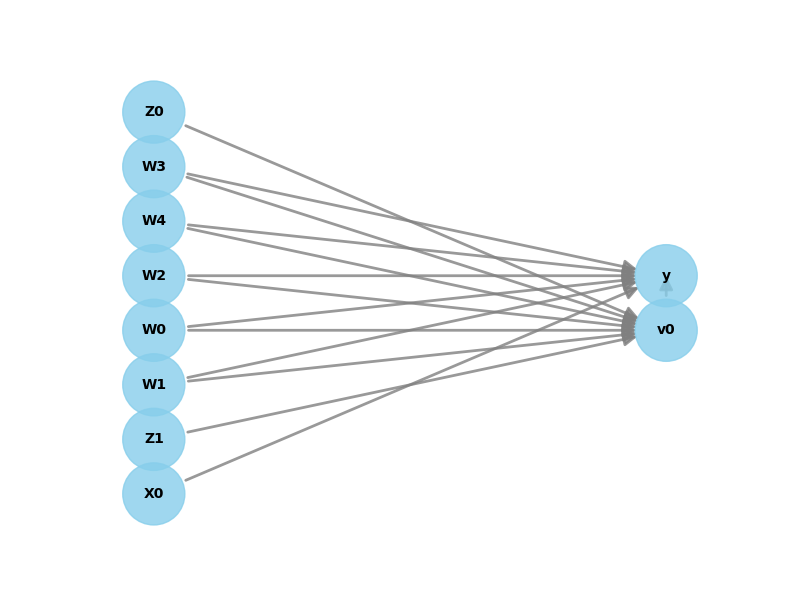

In [ ]:
model = CausalModel(
    data = df,
    treatment = data["treatment_name"],
    outcome = data["outcome_name"],
    graph = data["gml_graph"]
)

model.view_model()

In [16]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable = True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W0,W2,W3,W1,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W2,W3,W1,W4,U) = P(y|v0,W0,W2,W3,W1,W4)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₀  Z₁]    ⎝d[Z₀  Z₁]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0,Z1})
Estimand assumption 2, Exclusion: If we remove {Z0,Z1}→{v0}, then ¬({Z0,Z1}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
  d                       
─────(E[y|W1,W0,W2,W4,W3])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W1,W0,W2,W4,W3,U) = P(y|v0,W1,W0,W2,W4,W3)



In [ ]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)